<a href="https://colab.research.google.com/github/rendypradanarynaldy20/UAS_Analisis-Data-Kompeks-Perminyakan/blob/main/Model_Unsupervised_Facies_data2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 **Struktur Analisis**

1. Import library
2. Load & preprocessing data
3. Standardisasi data
4. K-Means Clustering
5. Gaussian Mixture Model (GMM)
6. DBSCAN Clustering
7. Evaluasi (Silhouette Score)
8. Visualisasi (PCA)
9. Perbandingan hasil

In [ ]:
#Library Python untuk Unsupervised Learning dan Visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


**Cell 2 — Upload Dataset**

Fungsi:
* Mengunggah file dataset secara manual di Google Colab

Hasil:
* Dataset facies_data2.csv tersedia di environment kerja

In [ ]:
# Upload data yang digunakan (Facies_data2)
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_csv(list(uploaded.keys())[0])


Saving facies_data2.csv to facies_data2 (5).csv


Cell 3 — Load Dataset

Fungsi:
* Membaca dataset facies ke dalam DataFrame df
* df.head() menampilkan 5 baris pertama

Hasil:
* Memastikan data berhasil dimuat
* Memahami struktur kolom dari data **facies_data2** (GR, PHIND, PE, Facies, dll.)

In [ ]:
# Menampilkan data (Facies_data2)
df = pd.read_csv("/content/facies_data2.csv")
df.head()


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


**Cell 4 — Distribusi Data (Histogram)**

Fungsi:
* Menampilkan distribusi masing-masing fitur numerik

**Hasil Distribusi Data (Histogram)**
* Output yang dihasilkan:
  * Histogram untuk fitur GR, ILD_log10, PHIND, DeltaPHI, PE, dan Depth.

**Pembahasan:**
* Histogram menunjukkan bahwa setiap log memiliki rentang dan distribusi yang berbeda.
* Beberapa fitur, seperti GR dan ILD_log10, memperlihatkan distribusi yang tidak simetris (skewed), menandakan adanya variasi litologi dan kondisi reservoir.
* Perbedaan skala antar fitur ini menjadi dasar dilakukannya standardisasi data sebelum clustering.

📘 Makna:
* Distribusi yang beragam menegaskan bahwa data memiliki karakteristik multi-dimensi yang kompleks, sehingga pendekatan unsupervised learning diperlukan untuk mengidentifikasi pola tersembunyi.

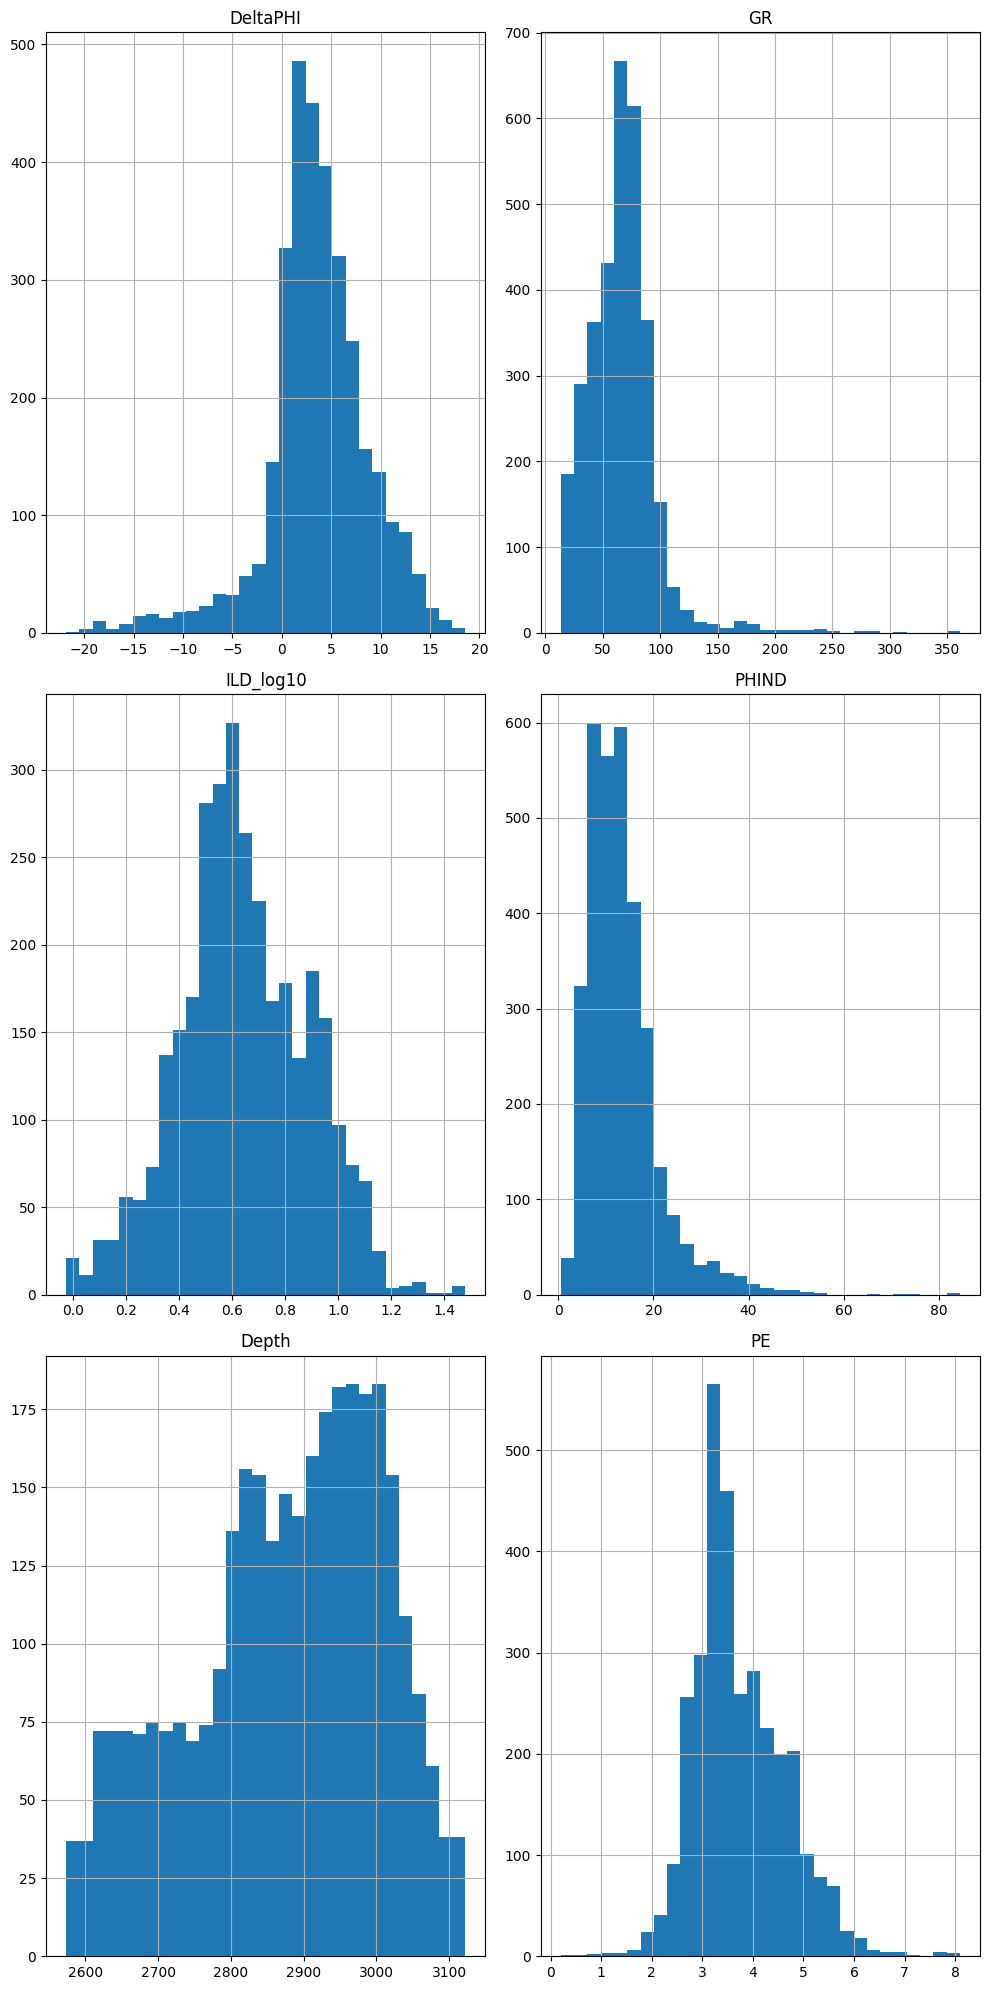

In [ ]:
stat = df[['DeltaPHI','GR','ILD_log10','PHIND','Depth','PE']]
stat.hist (figsize=(10,20),bins=30)
plt.tight_layout()
plt.show()

**Cell 5 — Korelasi Antar Fitur**

Fungsi:
* Menghitung korelasi Pearson antar fitur numerik
* Menampilkan heatmap korelasi

Hasil:
- Analisis korelasi antar log digunakan untuk memahami hubungan fisik antar parameter petrofisika:
- Korelasi negatif antara GR dan PHIND menunjukkan bahwa zona clean sand cenderung memiliki porositas lebih baik.
- Resistivitas (ILD_log10) relatif independen terhadap GR, menandakan potensi pemisahan litologi dan fluida.
- DeltaPHI berperan penting dalam mendeteksi efek gas pada reservoir.

<Axes: >

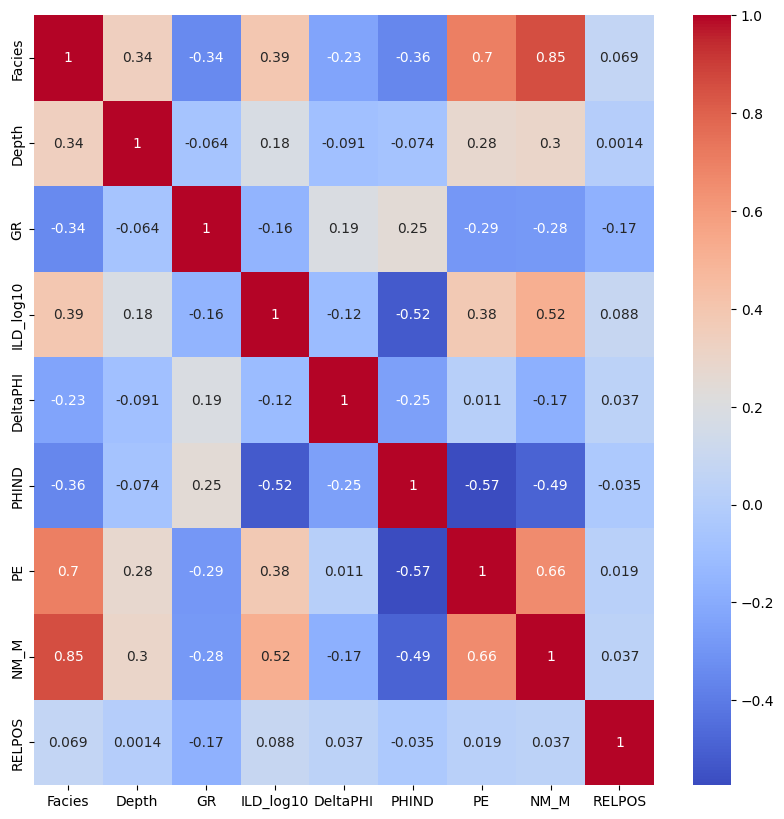

In [ ]:
df2 = df.corr (method='pearson' , numeric_only=True)
plt.figure(figsize=(10,10))
sns.heatmap(df2, cmap='coolwarm',annot=True)

**Cell 6 — Visualisasi Well Log vs Depth**

Fungsi:
* Mengurutkan data berdasarkan kedalaman
* Penting untuk analisis geologi vertikal

Plot well log terhadap kedalaman memberikan gambaran stratigrafi vertikal reservoir.  
Perubahan pola log menunjukkan adanya:
- Zona shale (GR tinggi, resistivitas rendah)
- Zona clean sand (GR rendah, porositas tinggi)
- Zona potensial hidrokarbon (resistivitas tinggi dan anomali DeltaPHI)


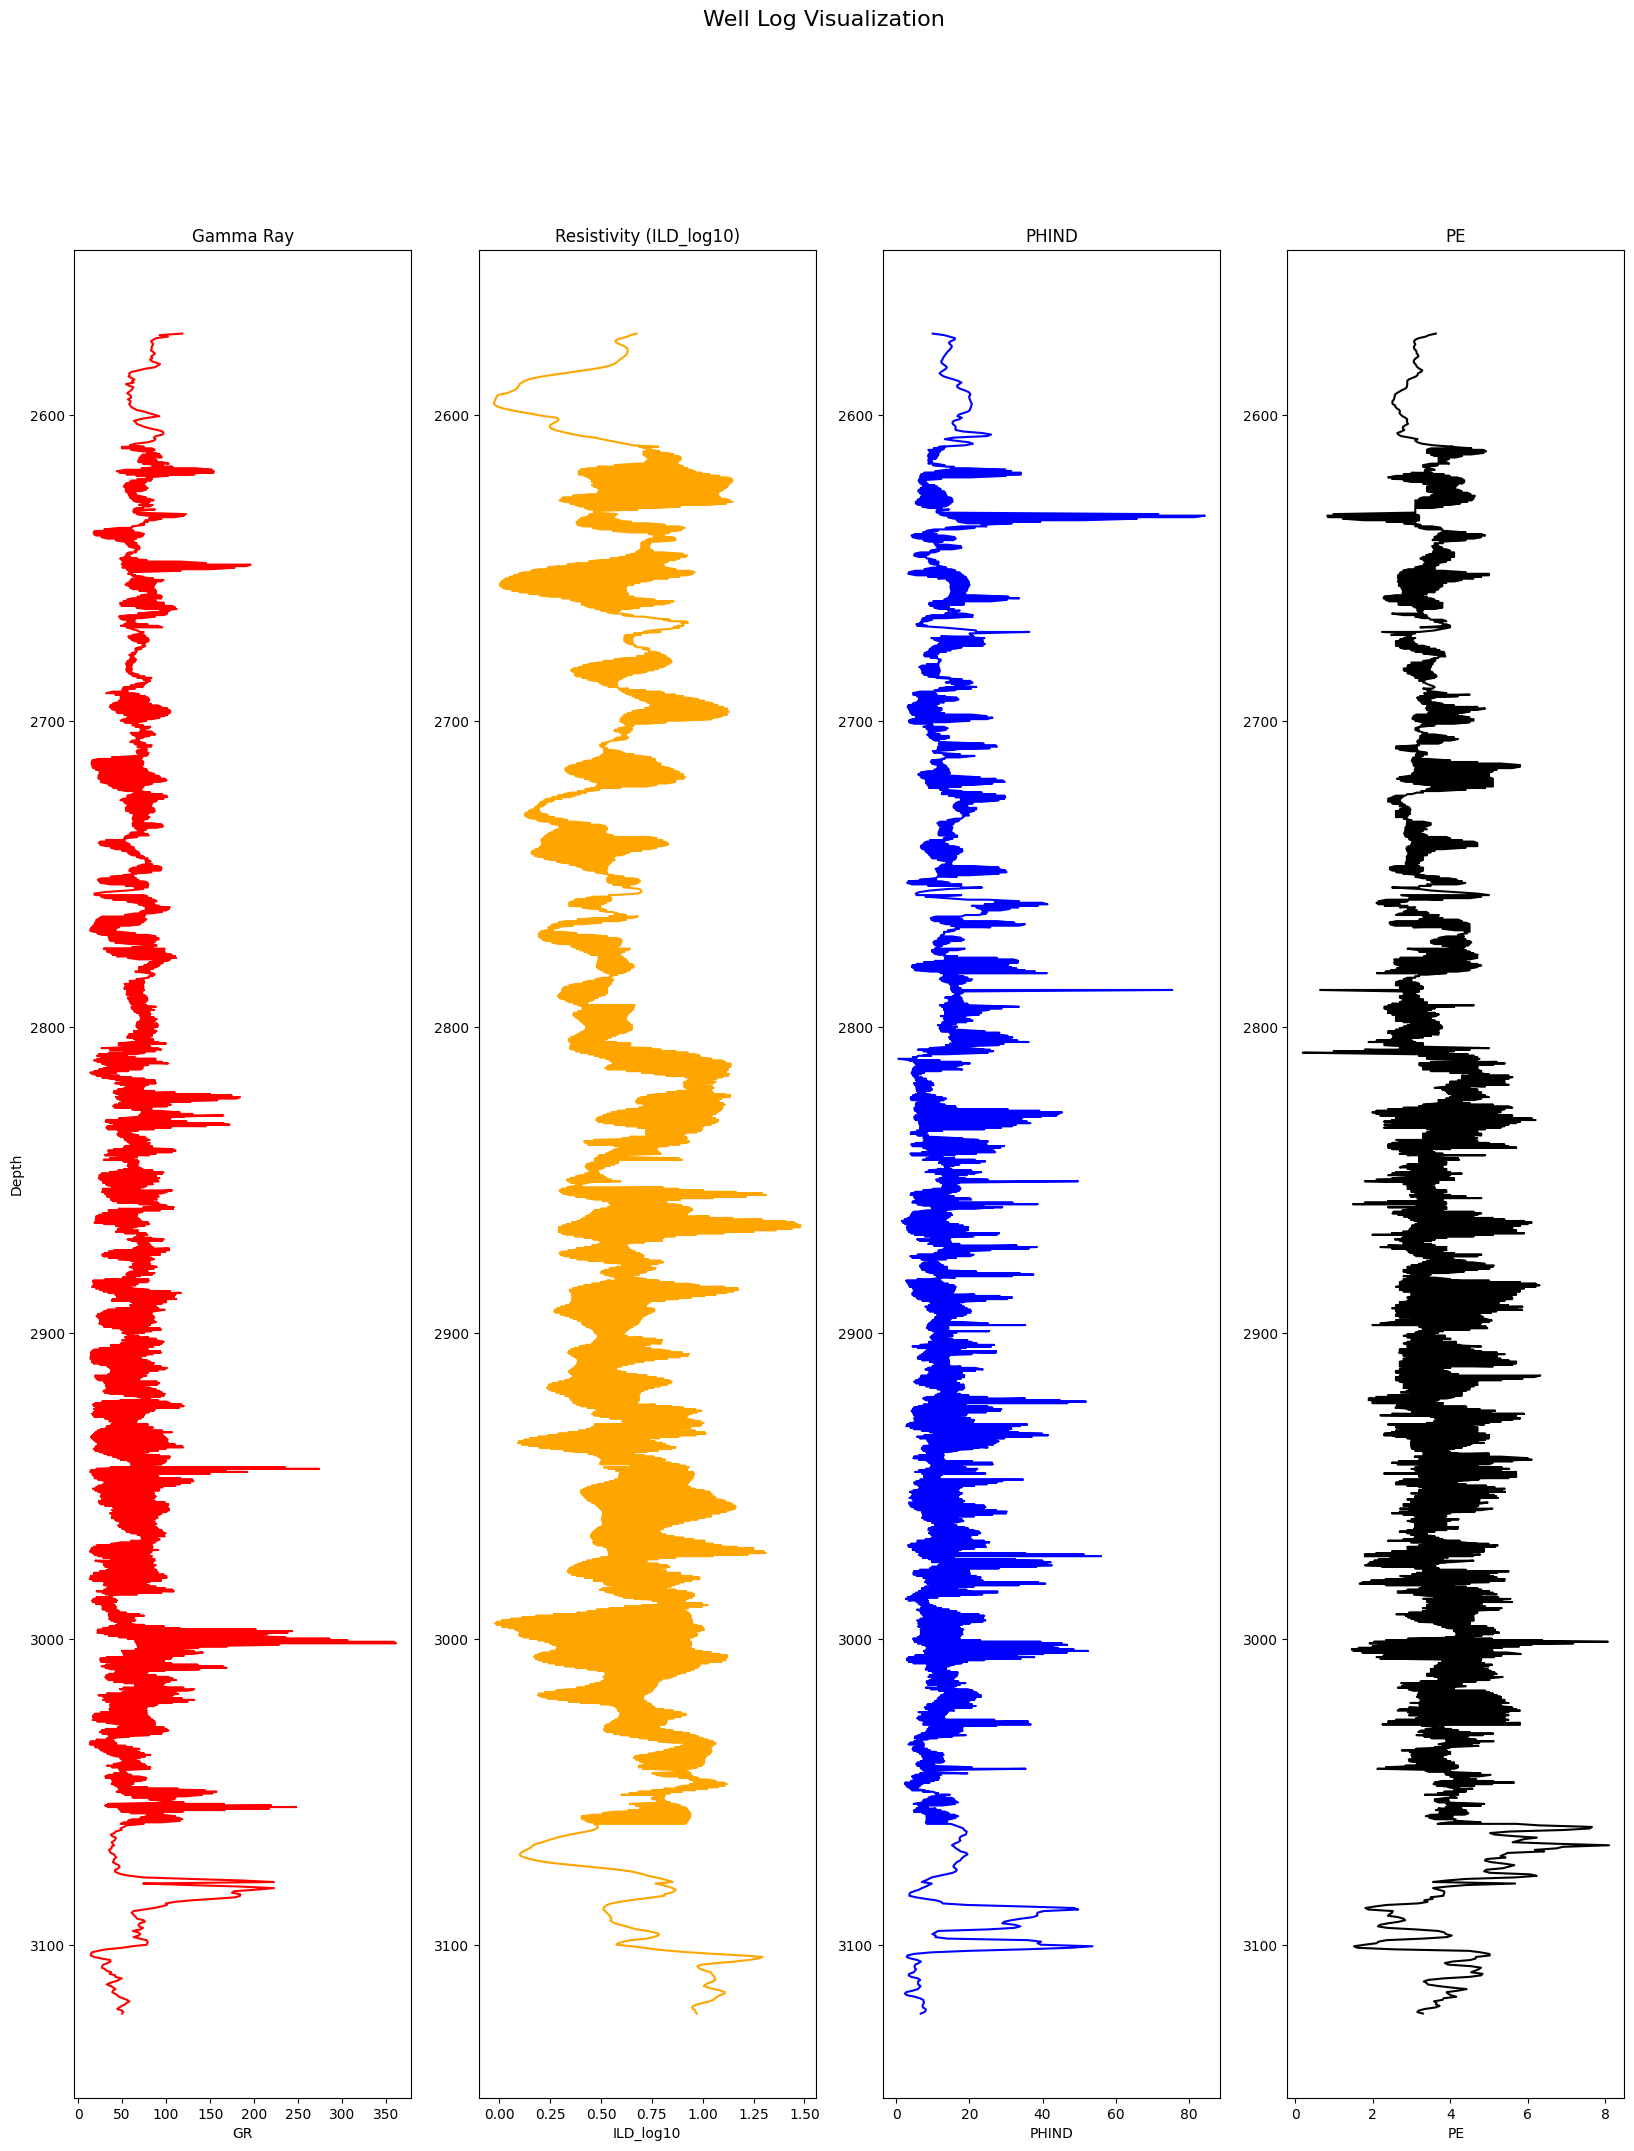

In [ ]:
# ===============================
# EDA: WELL LOG vs DEPTH
# ===============================

df = df.sort_values("Depth").reset_index(drop=True)

depth = df["Depth"]
GR = df["GR"]
ILD_log10 = df["ILD_log10"]
DeltaPHI = df["DeltaPHI"]
PHIND = df["PHIND"]
PE = df["PE"]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,24))
fig.suptitle('Well Log Visualization', fontsize=16)

ax1.plot(GR, depth, color='red')
ax1.invert_yaxis()
ax1.set_title('Gamma Ray')
ax1.set_xlabel('GR')
ax1.set_ylabel('Depth')

ax2.plot(ILD_log10, depth, color='orange')
ax2.invert_yaxis()
ax2.set_title('Resistivity (ILD_log10)')
ax2.set_xlabel('ILD_log10')

ax3.plot(PHIND, depth, color='blue')
ax3.invert_yaxis()
ax3.set_title('PHIND')
ax3.set_xlabel('PHIND')

ax4.plot(PE, depth, color='black')
ax4.invert_yaxis()
ax4.set_title('PE')
ax4.set_xlabel('PE')

plt.show()


## Scatter Plot Antar Fitur Berdasarkan Facies

Scatter plot antar fitur dengan pewarnaan berdasarkan facies digunakan untuk mengamati pola pemisahan antar kelas.  
Hasil visualisasi menunjukkan adanya overlap antar facies pada ruang fitur tertentu, sehingga pemisahan facies tidak dapat dilakukan secara sederhana. Hal ini memperkuat alasan penggunaan metode unsupervised learning untuk menemukan pola tersembunyi dalam data.

Crossplot antar log digunakan untuk membedakan fasies reservoir:
- GR vs DeltaPHI membantu mengidentifikasi zona gas sand.
- PHIND vs GR memisahkan clean sand dan shale.
- PHIND vs ILD_log10 menunjukkan hubungan porositas dan fluida.
- PE vs GR membantu identifikasi litologi karbonat dan silisiklastik.

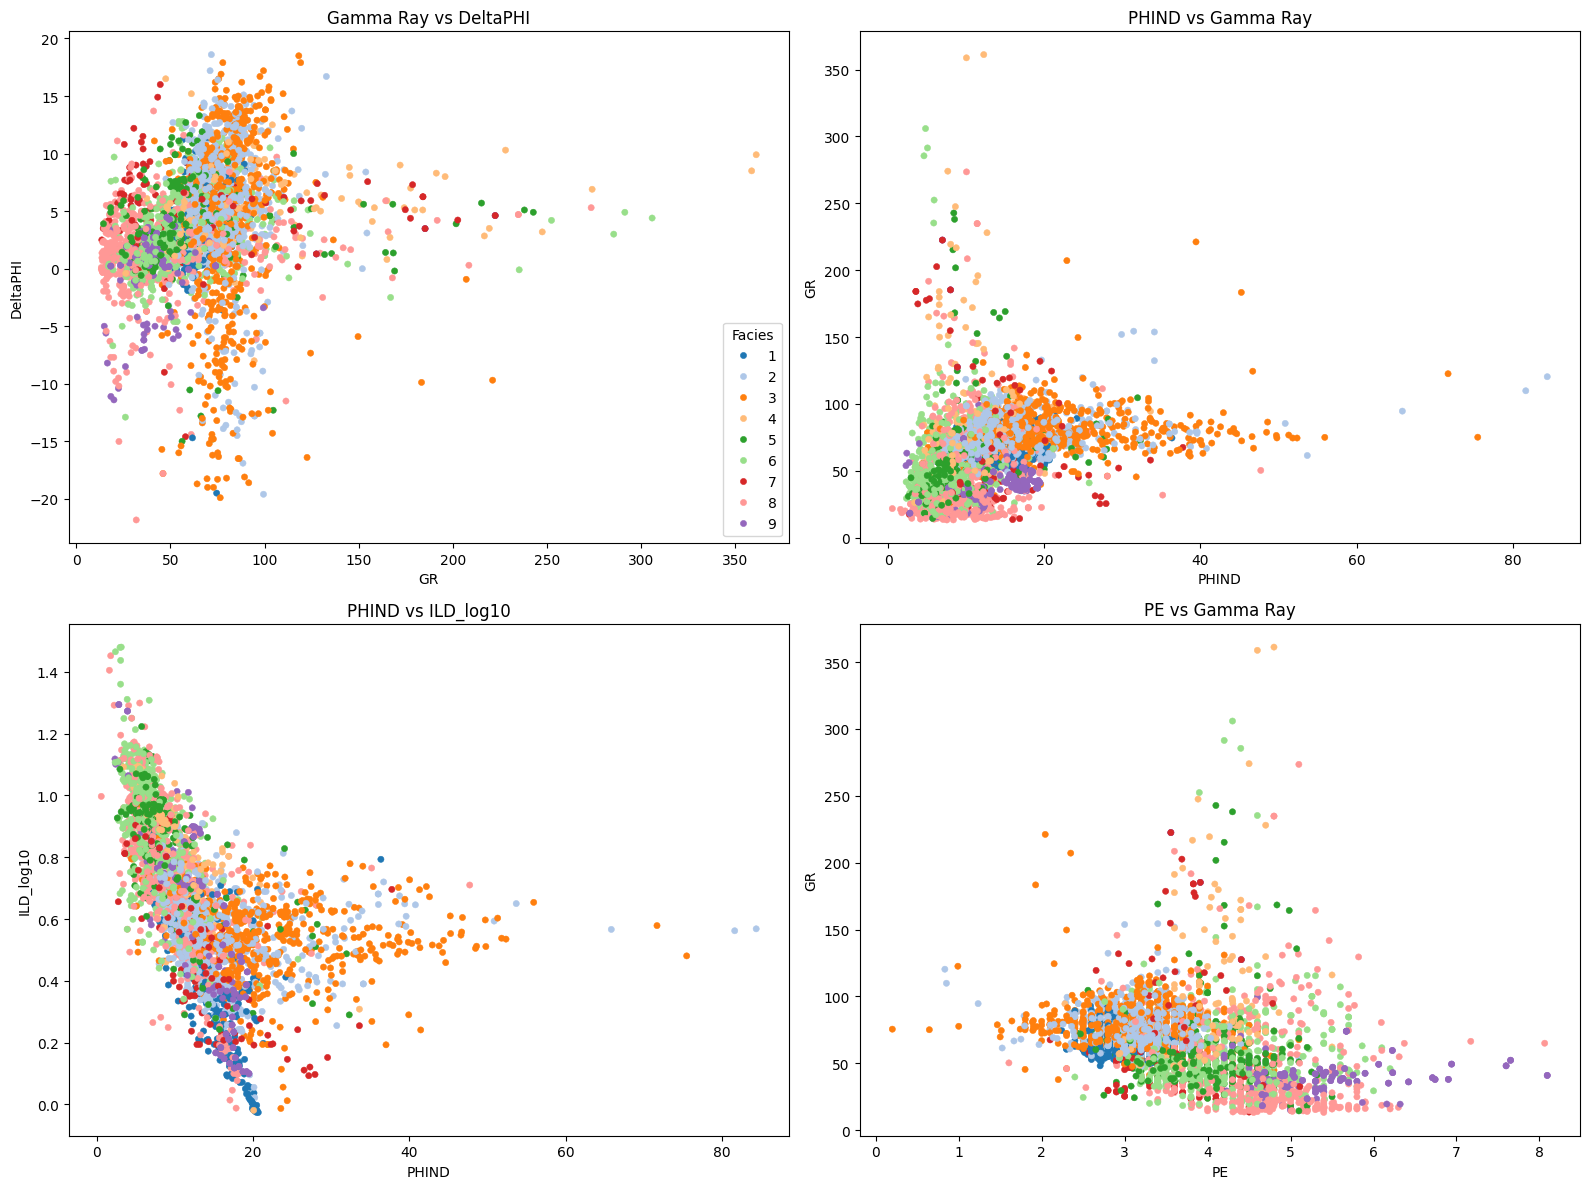

In [ ]:
# Scatter Plot Antar Fitur Berdasarkan Facies
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,12))

# Plot 1: GR vs DeltaPHI
plt.subplot(2, 2, 1)
sns.scatterplot(
    data=df,
    x="GR",
    y="DeltaPHI",
    hue="Facies",
    palette="tab20",
    s=20,
    edgecolor=None
)
plt.title("Gamma Ray vs DeltaPHI")

# Plot 2: PHIND vs GR
plt.subplot(2, 2, 2)
sns.scatterplot(
    data=df,
    x="PHIND",
    y="GR",
    hue="Facies",
    palette="tab20",
    s=20,
    edgecolor=None,
    legend=False
)
plt.title("PHIND vs Gamma Ray")

# Plot 3: PHIND vs ILD_log10
plt.subplot(2, 2, 3)
sns.scatterplot(
    data=df,
    x="PHIND",
    y="ILD_log10",
    hue="Facies",
    palette="tab20",
    s=20,
    edgecolor=None,
    legend=False
)
plt.title("PHIND vs ILD_log10")

# Plot 4: PE vs GR
plt.subplot(2, 2, 4)
sns.scatterplot(
    data=df,
    x="PE",
    y="GR",
    hue="Facies",
    palette="tab20",
    s=20,
    edgecolor=None,
    legend=False
)
plt.title("PE vs Gamma Ray")

plt.tight_layout()
plt.show()


**Cell 8 — Seleksi Fitur untuk Clustering**

Fungsi:
* Memilih fitur numerik relevan untuk clustering
* Menghindari kolom non-numerik dan label

Hasil:
* Dataset input clustering (X) terbentuk


In [ ]:
features = [
    'GR',
    'ILD_log10',
    'DeltaPHI',
    'PHIND',
    'PE',
    'NM_M',
    'RELPOS',
    'Depth'
]

X = data[features]


In [ ]:
# Cell 9 — Standardisasi Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Cell 10 — K-Means Clustering

Fungsi:
* Mengelompokkan data ke dalam 8 cluster
* Sebagai model baseline

Hasil:
* Nilai Silhouette Score menunjukkan bahwa hasil clustering berada pada kategori cukup baik, menandakan keseimbangan antara kohesi dan separasi cluster.

K-Means menghasilkan cluster dengan batas yang jelas dan stabil.  
Model ini efektif untuk memisahkan zona clean sand dan shale, namun memiliki keterbatasan dalam menangkap transisi fasies yang gradual.

In [ ]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

sil_kmeans = silhouette_score(X_scaled, labels_kmeans)
print("Silhouette Score K-Means:", sil_kmeans)


Silhouette Score K-Means: 0.18979767428759847


**Hasil Gaussian Mixture Model (GMM)**

Output yang dihasilkan:
* Label cluster GMM
* Nilai Silhouette Score
* Nilai AIC dan BIC

Pembahasan:
* GMM menghasilkan cluster yang lebih fleksibel dibanding K-Means.
* Model ini mampu menangkap overlap antar cluster, yang sesuai dengan kondisi geologi nyata.
* Nilai AIC dan BIC memberikan ukuran keseimbangan antara kompleksitas model dan kualitas fit.

In [ ]:
gmm = GaussianMixture(n_components=8, random_state=42)
labels_gmm = gmm.fit_predict(X_scaled)

sil_gmm = silhouette_score(X_scaled, labels_gmm)
print("Silhouette Score GMM:", sil_gmm)

print("BIC GMM:", gmm.bic(X_scaled))
print("AIC GMM:", gmm.aic(X_scaled))


Silhouette Score GMM: 0.14336309881201637
BIC GMM: 14130.071216665352
AIC GMM: 11947.043762014238


**Hasil DBSCAN**

Output yang dihasilkan:
* Label cluster termasuk label -1 sebagai noise
* Jumlah cluster yang terbentuk
* Silhouette Score (jika memenuhi syarat)

Pembahasan:
* DBSCAN mengidentifikasi sebagian data sebagai noise.
* Jumlah cluster yang terbentuk tidak selalu stabil.
* Model sensitif terhadap parameter eps dan min_samples.

In [ ]:
dbscan = DBSCAN(eps=0.7, min_samples=10)
labels_dbscan = dbscan.fit_predict(X_scaled)

# Silhouette hanya jika cluster > 1
if len(set(labels_dbscan)) > 1 and -1 not in set(labels_dbscan):
    sil_dbscan = silhouette_score(X_scaled, labels_dbscan)
else:
    sil_dbscan = -1

print("Silhouette Score DBSCAN:", sil_dbscan)
print("Jumlah cluster DBSCAN:", len(set(labels_dbscan)))


Silhouette Score DBSCAN: -1
Jumlah cluster DBSCAN: 25


**Cell 13 — PCA**

Fungsi:
* Reduksi dimensi untuk visualisasi
* Tidak memengaruhi hasil clustering

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


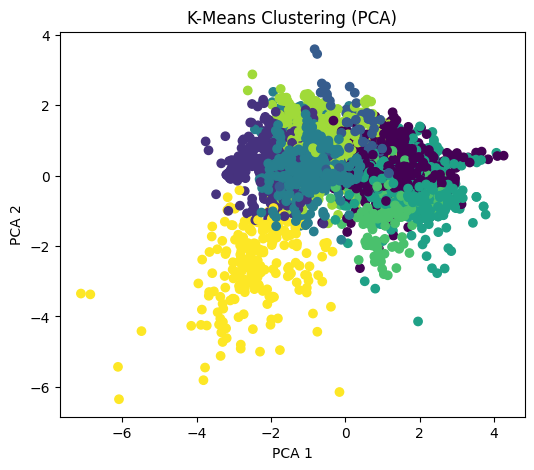

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans)
plt.title("K-Means Clustering (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


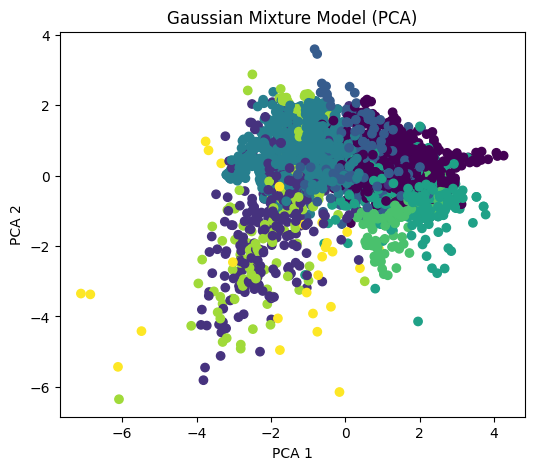

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_gmm)
plt.title("Gaussian Mixture Model (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


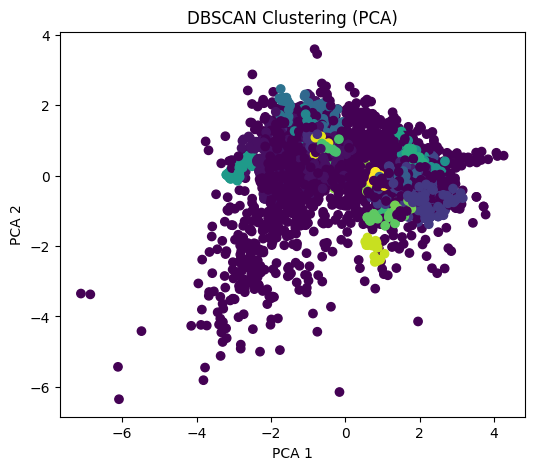

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan)
plt.title("DBSCAN Clustering (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


**Perbandingan Hasil Antar Model**

Output yang dihasilkan:
* Tabel perbandingan K-Means, GMM, dan DBSCAN.

Pembahasan:
* K-Means dan GMM menunjukkan performa yang lebih konsisten dibanding DBSCAN.
* GMM unggul dalam menangani overlap facies.
* DBSCAN memiliki keterbatasan pada struktur data ini.

In [ ]:
comparison = pd.DataFrame({
    "Model": ["K-Means", "GMM", "DBSCAN"],
    "Jumlah Cluster": [
        len(set(labels_kmeans)),
        len(set(labels_gmm)),
        len(set(labels_dbscan))
    ],
    "Silhouette Score": [
        sil_kmeans,
        sil_gmm,
        sil_dbscan
    ]
})

comparison


,Model,Jumlah Cluster,Silhouette Score
0,K-Means,8,0.189798
1,GMM,8,0.143363
2,DBSCAN,25,-1.000000


## Kesimpulan

Pendekatan unsupervised learning mampu mengidentifikasi fasies reservoir berdasarkan log petrofisika secara efektif.  
Gaussian Mixture Model memberikan interpretasi yang paling mendekati kondisi geologi sebenarnya, sementara K-Means tetap relevan sebagai pembanding.

Analisis ini mendukung proses reservoir characterization dan dapat dikembangkan lebih lanjut untuk perhitungan properti reservoir seperti net pay dan saturation.
